<a href="https://colab.research.google.com/github/haytharmyohtet/Python-EDA-of-Thai-lottery-dataset/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from datetime import datetime

# Map Thai month names to English month names
thai_to_english_months = {
    'มกราคม': 'January',
    'กุมภาพันธ์': 'February',
    'มีนาคม': 'March',
    'เมษายน': 'April',
    'พฤษภาคม': 'May',
    'มิถุนายน': 'June',
    'กรกฎาคม': 'July',
    'สิงหาคม': 'August',
    'กันยายน': 'September',
    'ตุลาคม': 'October',
    'พฤศจิกายน': 'November',
    'ธันวาคม': 'December'
}

# Map Thai numerals to normal numerals
thai_to_arabic_digits = str.maketrans('๐๑๒๓๔๕๖๗๘๙', '0123456789')

def convert_thai_date(thai_date_text):
    thai_date_text = thai_date_text.translate(thai_to_arabic_digits)
    match = re.search(r'งวด\s+(\d+)\s+(\w+)\s+(\d+)', thai_date_text)
    if match:
        day, month_thai, year_thai = match.groups()
        month = thai_to_english_months.get(month_thai, month_thai)
        try:
            year = str(int(year_thai) - 543)
        except ValueError:
            year = year_thai
        return f"{month} {day}, {year}"
    # fallback simple split approach
    parts = thai_date_text.split()
    for i, part in enumerate(parts):
        if part == "งวด" and i+3 < len(parts):
            day, month_thai, year_thai = parts[i+1], parts[i+2], parts[i+3]
            month = thai_to_english_months.get(month_thai, month_thai)
            try:
                year = str(int(year_thai) - 543)
            except ValueError:
                year = year_thai
            return f"{month} {day}, {year}"
    return thai_date_text

def process_year_page(url):
    print(f"Processing URL: {url}")
    data = []
    try:
        resp = requests.get(url)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.text, 'html.parser')
        table = soup.find('table', id='dl_lottery_stats_list')
        if not table:
            print(f" Table not found for {url}")
            return data
        for row in table.find_all('tr'):
            a = row.find('a')
            dr = row.find('div', class_='lot-dr')
            if not (a and dr):
                continue
            thai_date = a.get_text(strip=True)
            eng_date = convert_thai_date(thai_date)
            prizes = [d.get_text(strip=True) for d in dr.find_all('div', class_='lot-dc')]
            if len(prizes) >= 4:
                data.append({
                    'Date': eng_date,
                    'First Prize': prizes[0],
                    '3 Front Numbers': prizes[1],
                    '3 Last Numbers': prizes[2],
                    '2 Last Numbers': prizes[3],
                })
    except Exception as e:
        print(f"Error on {url}: {e}")
    return data


current_ad = datetime.now().year
current_be = current_ad + 543

years = []
for i in range(31):
    years.append(current_be - i)

all_data = []
for be_year in years:
    url = f"https://www.myhora.com/lottery/result-{be_year}.aspx"
    year_data = process_year_page(url)
    print(f" → {be_year}: {len(year_data)} entries")
    all_data.extend(year_data)

# Build DataFrame and sort
df = pd.DataFrame(all_data)
df['DateObj'] = pd.to_datetime(df['Date'], format='%B %d, %Y')
df = df.sort_values('DateObj', ascending=False).drop('DateObj', axis=1)

print(f"\nTotal entries: {len(df)}")
# Export the data to excel
df.to_excel('lottery_data.xlsx', index=False)

Processing URL: https://www.myhora.com/lottery/result-2568.aspx
 → 2568: 8 entries
Processing URL: https://www.myhora.com/lottery/result-2567.aspx
 → 2567: 23 entries
Processing URL: https://www.myhora.com/lottery/result-2566.aspx
 → 2566: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2565.aspx
 → 2565: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2564.aspx
 → 2564: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2563.aspx
 → 2563: 21 entries
Processing URL: https://www.myhora.com/lottery/result-2562.aspx
 → 2562: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2561.aspx
 → 2561: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2560.aspx
 → 2560: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2559.aspx
 → 2559: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2558.aspx
 → 2558: 24 entries
Processing URL: https://www.myhora.com/lottery/result-2557.aspx
 → 2557: 24 e

In [ ]:
df

,Date,First Prize,3 Front Numbers,3 Last Numbers,2 Last Numbers
0,"April 16, 2025",266227,254 413,474 760,85
1,"April 1, 2025",669687,635 760,180 666,36
2,"March 16, 2025",757563,595 927,309 457,32
3,"March 1, 2025",818894,139 530,656 781,54
4,"February 16, 2025",847377,268 613,001 652,50
...,...,...,...,...,...
719,"March 16, 1995",646847,,225 044 091 220,67
720,"March 1, 1995",411454,,034 019 022 152,71
721,"February 16, 1995",869070,,828 597 462 126,95
722,"February 1, 1995",198162,,195 087 805 574,48


##**Load the excel dataset 'lottery_data.xlsx'**

In [ ]:
# Uncomment and run this to load 'lottery_data.xlsx' from your device
# import pandas as pd
# import matplotlib.pyplot as plt
# df = pd.read_excel('lottery_data.xlsx')

In [ ]:
df

,Date,First Prize,3 Front Numbers,3 Last Numbers,2 Last Numbers
0,"April 16, 2025",266227,254 413,474 760,85
1,"April 1, 2025",669687,635 760,180 666,36
2,"March 16, 2025",757563,595 927,309 457,32
3,"March 1, 2025",818894,139 530,656 781,54
4,"February 16, 2025",847377,268 613,001 652,50
...,...,...,...,...,...
719,"March 16, 1995",646847,NaN,225 044 091 220,67
720,"March 1, 1995",411454,NaN,034 019 022 152,71
721,"February 16, 1995",869070,NaN,828 597 462 126,95
722,"February 1, 1995",198162,NaN,195 087 805 574,48


##**3 Front Numbers**

In [ ]:
# Split the '3 Front Numbers' column by spaces
front = (
    df[['Date', '3 Front Numbers']]  # Select the relevant columns
    .assign(Number=lambda d: d['3 Front Numbers'].str.split())  # Split the 3 Front Numbers column into lists
    .explode('Number')  # Explode the list into separate rows
    .drop(columns='3 Front Numbers')  # Drop the original '3 Front Numbers' column
)

# Strip leading/trailing spaces and remove rows with empty strings or spaces
front['Number'] = front['Number'].str.strip()

# Filter out rows where 'Number' is empty or only contains spaces
front = front[front['Number'] != '']

# Drop rows with NaN values (in case there were any non-numeric values)
front = front.dropna(subset=['Number'])


In [ ]:
front

,Date,Number
0,"April 16, 2025",254
0,"April 16, 2025",413
1,"April 1, 2025",635
1,"April 1, 2025",760
2,"March 16, 2025",595
...,...,...
226,"October 1, 2015",918
227,"September 16, 2015",435
227,"September 16, 2015",209
228,"September 1, 2015",260


In [ ]:
# First, make sure 'Number' is an integer with 3 digits
front['Number'] = front['Number'].astype(int)

# Extract hundreds, tens, and ones digits
front['Hundreds'] = front['Number'] // 100          # Divide by 100
front['Tens'] = (front['Number'] // 10) % 10         # Remove hundreds, then get tens
front['Ones'] = front['Number'] % 10                 # Remainder gives ones place

# Now, count the appearances for each digit at each position
hundreds_count = front['Hundreds'].value_counts().sort_index()
tens_count = front['Tens'].value_counts().sort_index()
ones_count = front['Ones'].value_counts().sort_index()

# Combine the counts into a single DataFrame for easy viewing
front_digit_counts = pd.DataFrame({
    'Hundreds Place': hundreds_count,
    'Tens Place': tens_count,
    'Ones Place': ones_count
}).fillna(0).astype(int)  # Fill missing digits with 0 and make sure integers

# Show result
front_digit_counts


,Hundreds Place,Tens Place,Ones Place
0,40,47,51
1,46,49,45
2,53,51,38
3,53,61,46
4,38,43,47
5,47,36,46
6,48,44,49
7,42,44,38
8,41,46,49
9,50,37,49


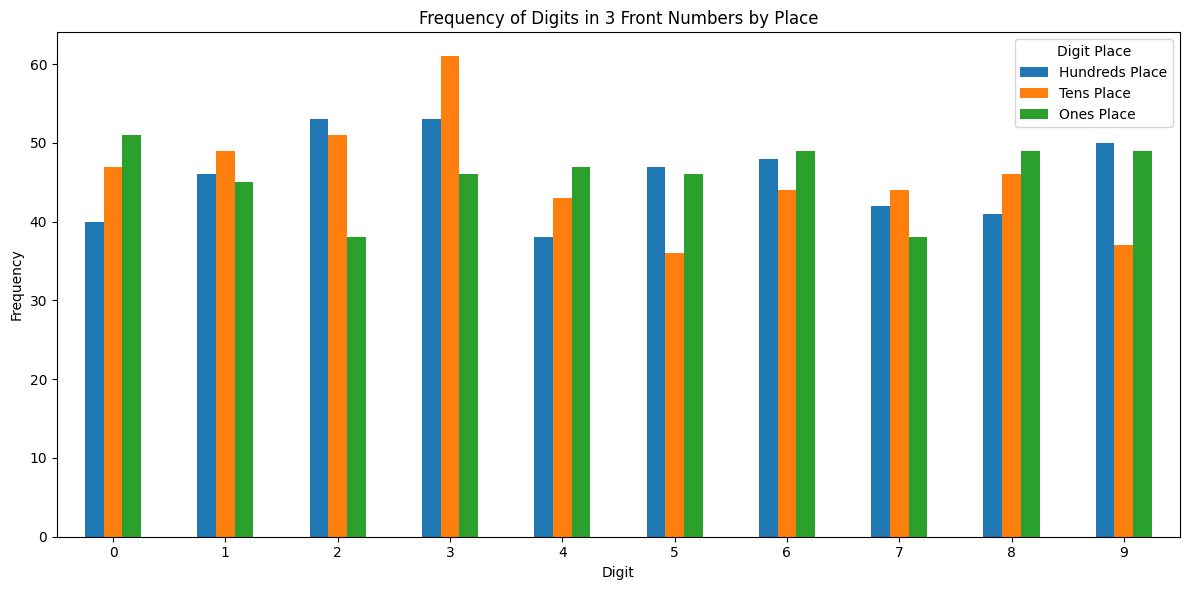

In [ ]:
import matplotlib.pyplot as plt

front_digit_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Digits in 3 Front Numbers by Place')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Digit Place')
plt.tight_layout()
plt.show()

##**3 Last Numbers**

In [ ]:
back = (
    df[['Date', '3 Last Numbers']]
    .assign(Number=lambda d: d['3 Last Numbers'].str.split())
    .explode('Number')
    .drop(columns='3 Last Numbers')
)

In [ ]:
back

,Date,Number
0,"April 16, 2025",474
0,"April 16, 2025",760
1,"April 1, 2025",180
1,"April 1, 2025",666
2,"March 16, 2025",309
...,...,...
722,"February 1, 1995",574
723,"January 16, 1995",186
723,"January 16, 1995",667
723,"January 16, 1995",253


In [ ]:
# First, make sure 'Number' is an integer with 3 digits
back['Number'] = back['Number'].astype(int)

# Extract hundreds, tens, and ones digits
back['Hundreds'] = back['Number'] // 100          # Divide by 100
back['Tens'] = (back['Number'] // 10) % 10         # Remove hundreds, then get tens
back['Ones'] = back['Number'] % 10                 # Remainder gives ones place

# Now, count the appearances for each digit at each position
hundreds_count = back['Hundreds'].value_counts().sort_index()
tens_count = back['Tens'].value_counts().sort_index()
ones_count = back['Ones'].value_counts().sort_index()

# Combine the counts into a single DataFrame for easy viewing
back_digit_counts = pd.DataFrame({
    'Hundreds Place': hundreds_count,
    'Tens Place': tens_count,
    'Ones Place': ones_count
}).fillna(0).astype(int)  # Fill missing digits with 0 and make sure integers

# Show result
back_digit_counts

,Hundreds Place,Tens Place,Ones Place
0,247,270,234
1,239,213,227
2,262,237,234
3,244,219,227
4,237,236,277
5,252,234,258
6,248,238,275
7,241,261,244
8,222,277,232
9,246,253,230


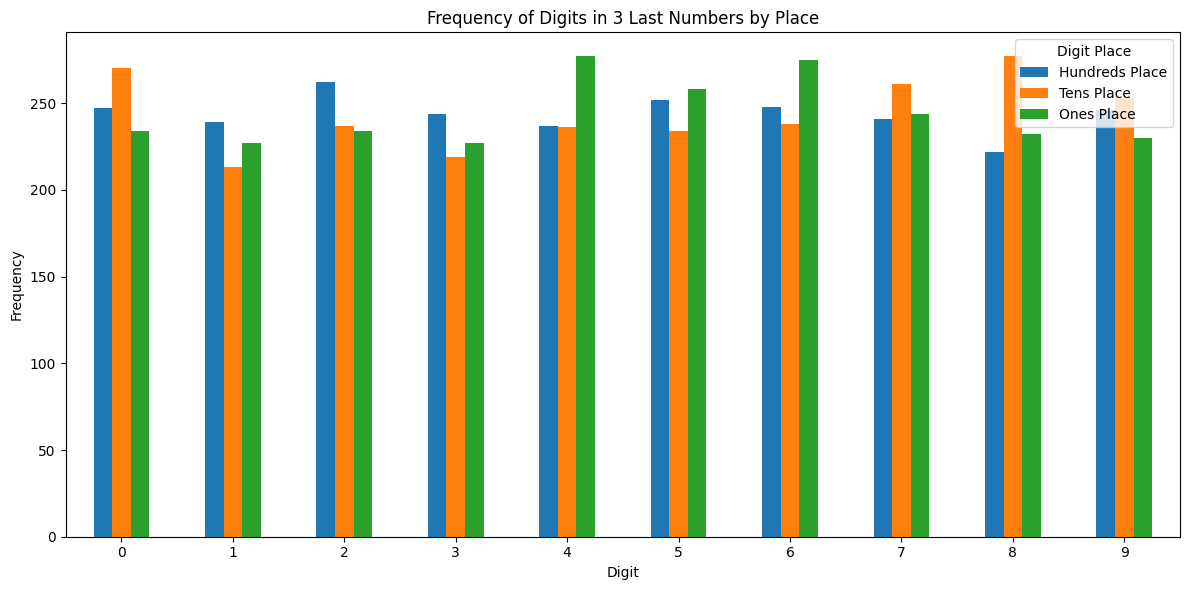

In [ ]:
# Plotting for 3 Last Numbers
back_digit_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Digits in 3 Last Numbers by Place')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Digit Place')
plt.tight_layout()
plt.show()


##**Last 2 Numbers**

In [ ]:
#Two Digits
import pandas as pd

# Assuming your DataFrame is named 'df' and has a column '2 Last Numbers'

def analyze_frequencies(df):
  """Analyzes the frequencies of numbers 0-9 in the '2 Last Numbers' column.

  Args:
    df: Pandas DataFrame containing the lottery data.

  Returns:
    Pandas DataFrame with columns 'Number', 'Occurance on first digit',
    'Occurance on second digit'.
  """

  frequencies = pd.DataFrame({'Number': range(10)})
  frequencies['Occurance on first digit'] = 0
  frequencies['Occurance on second digit'] = 0

  for index, row in df.iterrows():
    number_str = str(row['2 Last Numbers'])
    if len(number_str) >= 2:  # Ensure at least 2 digits
      first_digit = int(number_str[0])
      second_digit = int(number_str[1])

      frequencies.loc[frequencies['Number'] == first_digit, 'Occurance on first digit'] += 1
      frequencies.loc[frequencies['Number'] == second_digit, 'Occurance on second digit'] += 1

  return frequencies

# Example usage:
result_df = analyze_frequencies(df)
#print(result_df) # To see the output, run the code.

   Number  Occurance on first digit  Occurance on second digit
0       0                        63                         63
1       1                        68                         71
2       2                        72                         75
3       3                        60                         63
4       4                        65                         62
5       5                        87                         87
6       6                        89                         77
7       7                        62                         71
8       8                        71                         74
9       9                        87                         81


In [ ]:
result_df

,Number,Occurance on first digit,Occurance on second digit
0,0,63,63
1,1,68,71
2,2,72,75
3,3,60,63
4,4,65,62
5,5,87,87
6,6,89,77
7,7,62,71
8,8,71,74
9,9,87,81


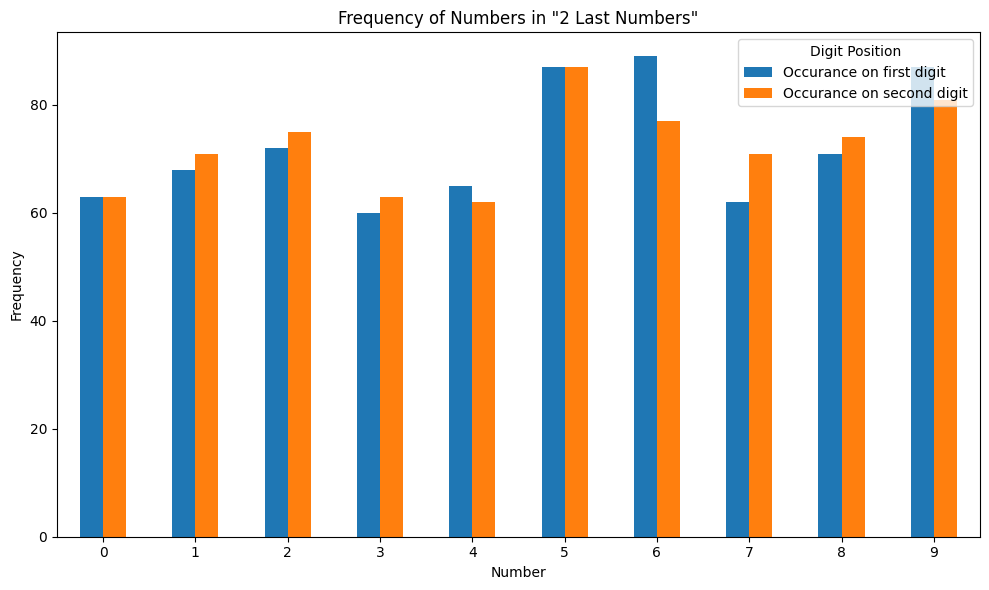

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the 'result_df' from the previous code

def visualize_frequencies(result_df):
    """Visualizes the frequencies of numbers in a bar chart."""
    result_df.plot(x='Number',
                   y=['Occurance on first digit', 'Occurance on second digit'],
                   kind='bar',
                   figsize=(10, 6))
    plt.title('Frequency of Numbers in "2 Last Numbers"')
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.legend(title='Digit Position', loc='upper right')
    plt.tight_layout()
    plt.show()  # To see the output, run the code.


# Example Usage
visualize_frequencies(result_df) #To see the output, run the code.

##**First Prize**

In [ ]:
# Extract First Prize numbers into a clean DataFrame
first = df[['Date', 'First Prize']].copy()
first = first[first['First Prize'].notna()]  # remove missing
first['First Prize'] = first['First Prize'].str.strip()

In [ ]:
first

,Date,First Prize
0,"April 16, 2025",266227
1,"April 1, 2025",669687
2,"March 16, 2025",757563
3,"March 1, 2025",818894
4,"February 16, 2025",847377
...,...,...
719,"March 16, 1995",646847
720,"March 1, 1995",411454
721,"February 16, 1995",869070
722,"February 1, 1995",198162


##**First digit distribution in first prize**

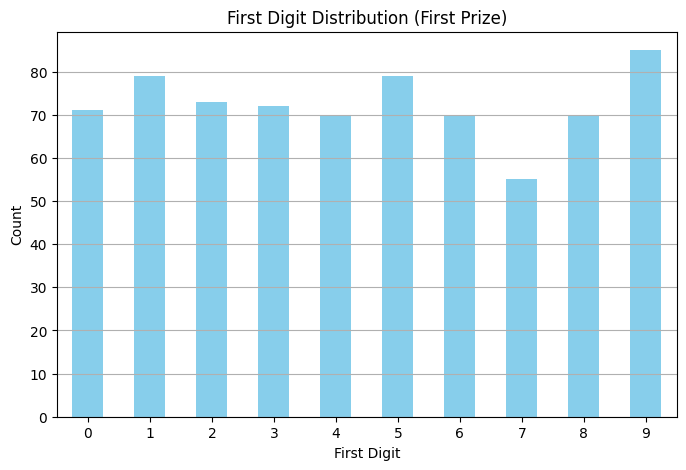

In [ ]:
# First digit
first['First Digit'] = first['First Prize'].str[0]

# Plot
first_digit_counts = first['First Digit'].value_counts().sort_index()

plt.figure(figsize=(8,5))
first_digit_counts.plot(kind='bar', color='skyblue')
plt.title('First Digit Distribution (First Prize)')
plt.xlabel('First Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


##**Last digit distribution in first prize**

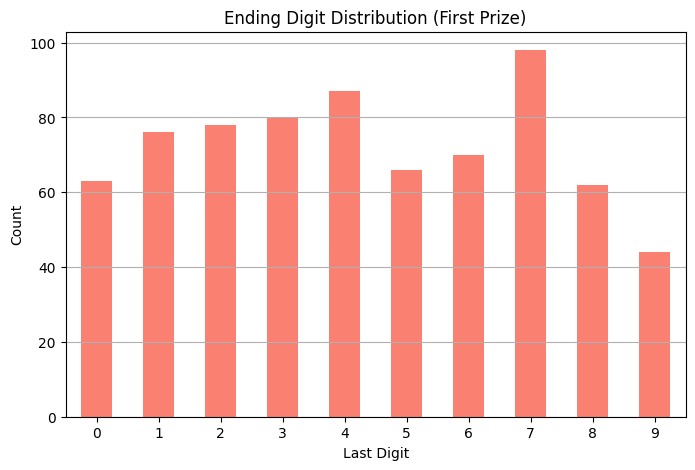

In [ ]:
# Last digit
first['Last Digit'] = first['First Prize'].str[-1]

# Plot
last_digit_counts = first['Last Digit'].value_counts().sort_index()

plt.figure(figsize=(8,5))
last_digit_counts.plot(kind='bar', color='salmon')
plt.title('Ending Digit Distribution (First Prize)')
plt.xlabel('Last Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#**First prize range distribution**

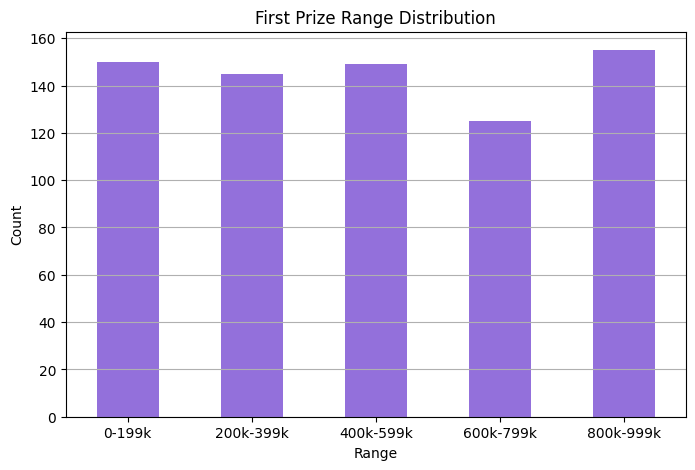

In [ ]:
# Convert to integer
first['First Prize Int'] = first['First Prize'].astype(int)

# Define ranges
def number_range(x):
    if x < 200000:
        return '0-199k'
    elif x < 400000:
        return '200k-399k'
    elif x < 600000:
        return '400k-599k'
    elif x < 800000:
        return '600k-799k'
    else:
        return '800k-999k'

first['Range'] = first['First Prize Int'].apply(number_range)

# Plot
range_counts = first['Range'].value_counts().sort_index()

plt.figure(figsize=(8,5))
range_counts.plot(kind='bar', color='mediumpurple')
plt.title('First Prize Range Distribution')
plt.xlabel('Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()